# Coursera Capstone Project: Segmenting and Clustering Neighborhoods in Toronto

Student: Jonathan Burritt

There are three parts to this assignment. They are:

* Part 1: Create a dataframe for postal information, scrape and clean data
* Part 2: Add longitude and latitude coordinates to dataframe
* Part 3: Explore and cluster neighborhoods


In [18]:
# Standard libaries

# For data structures

import pandas as pd

# For basic plottting

from matplotlib import pyplot as plt
%matplotlib inline

# For advanced plotting

import seaborn as sns

# For scientific computing

import numpy as np

# For python system functions

# Config option for displaying output
# Default is 'last_expr'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sys

# For clustering

import random
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

# For normalizing data

from sklearn.preprocessing import StandardScaler

# For plotting in 3D

from mpl_toolkits.mplot3d import Axes3D

# For capstone project

import folium
from bs4 import BeautifulSoup
import requests
import lxml
import html5lib
from pandas.io.html import read_html


### Part 1: Create a dataframe for postal information, scrape and clean data

In [19]:
# Import data from wikipedia

wiki_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
postal_code_table = read_html(wiki_url, attrs={"class":"wikitable"})

# Convert to dataframe

df_postal_code_table = postal_code_table[0]

# Export to csv for safekeeping

df_postal_code_table.to_csv('postal_code_table.csv')

# Explore the postal codes table data

df_postal_code_table.head()
df_postal_code_table.tail()
df_postal_code_table.shape

# Drop rows that have a 'Not assigned' borough

drop_rows = df_postal_code_table[df_postal_code_table['Borough']=='Not assigned'].index
df_postal_code_table.drop(drop_rows, inplace=True)

# Explore the postal codes table data

df_postal_code_table.head()
df_postal_code_table.tail()
df_postal_code_table.shape



,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


,Postal Code,Borough,Neighbourhood
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."
179,M9Z,Not assigned,Not assigned


(180, 3)

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


,Postal Code,Borough,Neighbourhood
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


(103, 3)

### Part 2: Add longitude and latitude coordinates to dataframe

In [20]:
# Read geospatial data into dataframe

df_postal_code_coor = pd.read_csv('geospatial_coordinates.csv')

# Explore the geospatial data

df_postal_code_coor.head()
df_postal_code_coor.tail()
df_postal_code_coor.shape

# Merge postal code table data and geospatial data

df_postal_code = pd.merge(df_postal_code_table, df_postal_code_coor, on='Postal Code')
df_postal_code.head(30)
df_postal_code.tail()
df_postal_code.shape


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


,Postal Code,Latitude,Longitude
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437
102,M9W,43.706748,-79.594054


(103, 3)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509
102,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999


(103, 5)

### Part 3: Explore and cluster neighborhoods

In [21]:
# Group postal codes by neighborhood

df_postal_code_neigh = df_postal_code.groupby(['Neighbourhood']).mean()
df_postal_code_neigh

,Latitude,Longitude
Neighbourhood,,
Agincourt,43.794200,-79.262029
"Alderwood, Long Branch",43.602414,-79.543484
"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
Bayview Village,43.786947,-79.385975
"Bedford Park, Lawrence Manor East",43.733283,-79.419750
...,...,...
"Willowdale, Willowdale West",43.782736,-79.442259
Woburn,43.770992,-79.216917
Woodbine Heights,43.695344,-79.318389


In [22]:
# Run k-means

df_postal_code_kmeans = df_postal_code_neigh[['Longitude', 'Latitude']]
df_postal_code_kmeans
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(df_postal_code_kmeans)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

,Longitude,Latitude
Neighbourhood,,
Agincourt,-79.262029,43.794200
"Alderwood, Long Branch",-79.543484,43.602414
"Bathurst Manor, Wilson Heights, Downsview North",-79.442259,43.754328
Bayview Village,-79.385975,43.786947
"Bedford Park, Lawrence Manor East",-79.419750,43.733283
...,...,...
"Willowdale, Willowdale West",-79.442259,43.782736
Woburn,-79.216917,43.770992
Woodbine Heights,-79.318389,43.695344


KMeans(n_clusters=3, n_init=12)

array([2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1])

array([[-79.52180436,  43.68055098],
       [-79.38884568,  43.6888214 ],
       [-79.26924577,  43.7595681 ]])

Text(0.5, 1.0, 'Toronto Neighborhoods')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

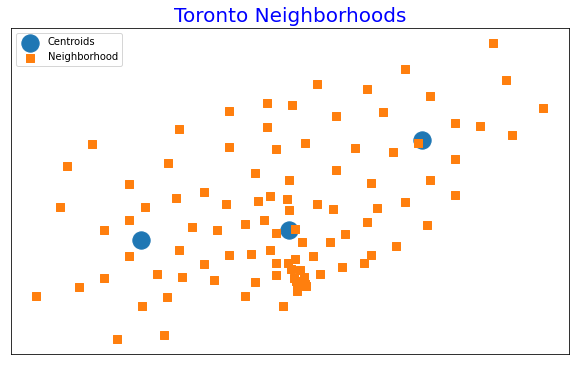

In [23]:
# Plot the clusters

fig = plt.figure(figsize=(10, 6))
x, y = k_means_cluster_centers.T
plt.scatter(x,y, label="Centroids", s=300)

# Plot the neighborhoods

plt.scatter(df_postal_code_neigh['Longitude'], df_postal_code_neigh['Latitude'], label='Neighborhood', marker='s', s=75)

# Customize plot

plt.title('Toronto Neighborhoods', fontsize=20, color='blue')
plt.xticks(())
plt.yticks(())
plt.legend(loc=2)
plt.show()